In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
data=pd.read_csv("economic_index.csv")

In [4]:
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [8]:
data.drop(columns=["year","month"],axis=1,inplace=True)

In [9]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [11]:
##visualization
import seaborn as sns


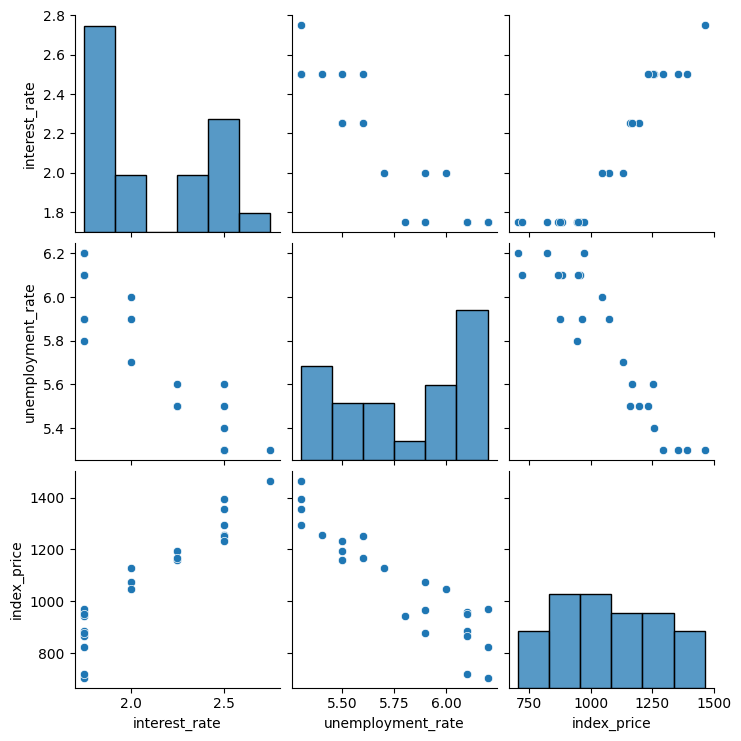

In [12]:
sns.pairplot(data)

In [13]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

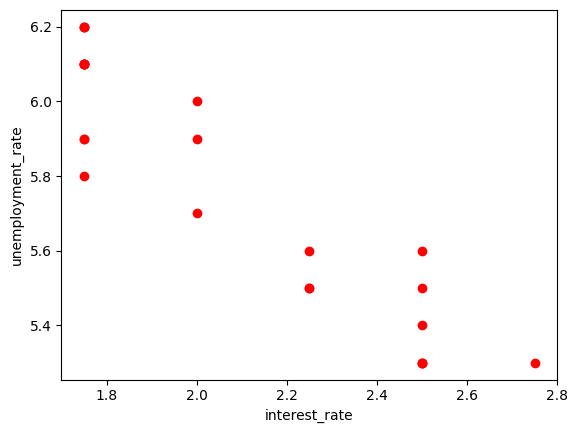

In [16]:
#visualization
plt.scatter(data["interest_rate"],data["unemployment_rate"],color="red")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [17]:
#independed and depeneded feature
X=data[["interest_rate","unemployment_rate"]]
y=data["index_price"]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

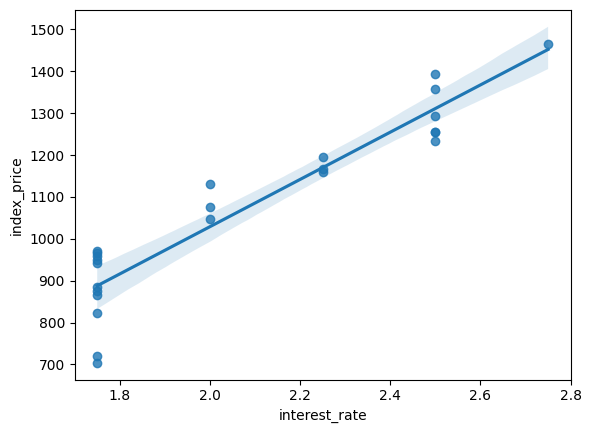

In [29]:
sns.regplot(x=data["interest_rate"],y=data["index_price"])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression=LinearRegression()

In [36]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
from sklearn.model_selection import cross_val_score

In [39]:
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3 )

In [42]:
np.mean(validation_score)

np.float64(-5914.828180162389)

In [43]:
y_prediction=regression.predict(X_test)

In [44]:
y_prediction

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

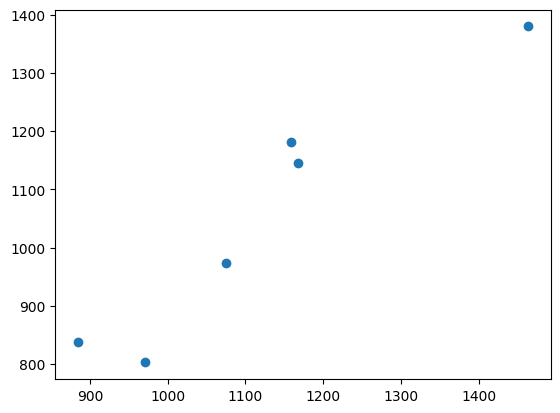

In [45]:
plt.scatter(y_test,y_prediction)

In [46]:
resudual=y_test-y_prediction
resudual

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

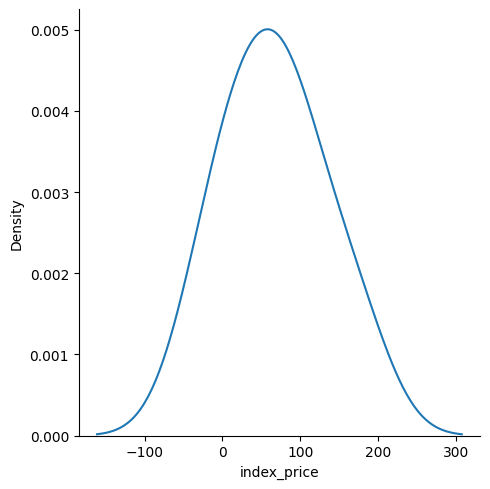

In [47]:
sns.displot(resudual,kind="kde")